In [6]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 60)
bpi2015= [] # list of the different csv logs 
for c in range(5):
    bpi2015.append(pd.read_csv("bpi2015_"+str(c+1)+".csv", low_memory=False))
    print(bpi2015[c].shape)
    print(bpi2015[c].columns)
    

(52217, 29)
Index(['case', 'event', 'startTime', 'completeTime', 'termName', 'startDate',
       'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases',
       'endDatePlanned', 'endDate', 'parts', 'requestComplete', 'last_phase',
       'landRegisterID', 'SUMleges', 'case_type', 'IDofConceptCase',
       'org:resource', 'activityNameEN', 'action_code', 'activityNameNL',
       'planned', 'dateStop', 'dateFinished', 'question', 'dueDate',
       'monitoringResource'],
      dtype='object')
(44354, 28)
Index(['case', 'event', 'startTime', 'completeTime', 'termName', 'startDate',
       'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases',
       'requestComplete', 'endDate', 'parts', 'last_phase', 'landRegisterID',
       'SUMleges', 'case_type', 'IDofConceptCase', 'activityNameEN',
       'org:resource', 'action_code', 'activityNameNL', 'planned', 'dateStop',
       'dateFinished', 'question', 'dueDate', 'monitoringResource'],
      dtype='object')
(

# Preprocessing
Starts the preprocessing to remove null values in the 5 datasets

In [7]:
for c in bpi2015:
    print(np.all(c.startTime == c.completeTime))

True
True
True
True
True


In [8]:
pd.concat([c.isnull().sum() for c in bpi2015], axis=1)


,0,1,2,3,4
case,0,0.0,0,0,0
event,0,0.0,0,0,0
startTime,0,0.0,0,0,0
completeTime,0,0.0,0,0,0
termName,13743,39802.0,8518,39767,46410
startDate,0,0.0,0,0,0
caseProcedure,46538,30728.0,51567,40434,52791
Responsible_actor,19,0.0,0,0,0
caseStatus,0,0.0,0,0,0
Includes_subCases,11280,10701.0,14066,7819,15027


In [9]:
bpi2015[0][['termName', 'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases', 'parts', 'landRegisterID']].dtypes

termName              object
caseProcedure         object
Responsible_actor    float64
caseStatus            object
Includes_subCases     object
parts                 object
landRegisterID       float64
dtype: object

In [10]:
for c in bpi2015:
    c.loc[:,['termName', 'caseProcedure','caseStatus', 'Includes_subCases', 'parts']] = c.loc[:,['termName', 'caseProcedure','caseStatus', 'Includes_subCases', 'parts']].fillna('NA')

In [11]:
print(np.any(pd.concat([c['Responsible_actor'].value_counts() for c in bpi2015], axis=1) == 0))
print(np.any(pd.concat([c['landRegisterID'].value_counts() for c in bpi2015], axis=1) == 0))

False
False


In [12]:
for c in bpi2015:
    c.loc[:,['Responsible_actor', 'landRegisterID']] = c.loc[:,['Responsible_actor', 'landRegisterID']].fillna(0)

In [13]:
print(np.any(pd.concat([c['SUMleges'].value_counts() for c in bpi2015], axis=1) == 0))

False


In [14]:
for c in bpi2015:
    c.loc[:,['SUMleges']] = c.loc[:,['SUMleges']].fillna(0)

In [15]:
for c in bpi2015:
    c['HasConceptCase'] = ~c['IDofConceptCase'].isnull()

In [16]:
pd.concat([c.isnull().sum() for c in bpi2015], axis=1)

,0,1,2,3,4
case,0,0.0,0,0,0
event,0,0.0,0,0,0
startTime,0,0.0,0,0,0
completeTime,0,0.0,0,0,0
termName,0,0.0,0,0,0
startDate,0,0.0,0,0,0
caseProcedure,0,0.0,0,0,0
Responsible_actor,0,0.0,0,0,0
caseStatus,0,0.0,0,0,0
Includes_subCases,0,0.0,0,0,0


In [17]:
pd.concat([c.nunique() for c in bpi2015], axis=1)

,0,1,2,3,4
case,1199,832.0,1409,1053,1156
event,398,410.0,383,356,389
startTime,24142,18522.0,28280,17480,21021
completeTime,24142,18522.0,28280,17480,21021
termName,14,10.0,14,14,11
startDate,741,582.0,818,696,754
caseProcedure,3,3.0,3,3,3
Responsible_actor,21,7.0,20,9,8
caseStatus,3,2.0,2,2,3
Includes_subCases,3,3.0,3,3,3


# Encoding the datasets

In [18]:
import EventLog as el
logs = [el.EventLog(c, 'case', 'completeTime') for c in bpi2015] # for each csv in bpi2015 create an EventLog object out of it 

/Users/florianlang/ProgrammingProjects/python/predictive-monitoring-evolution/EventLog.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temp = pd.to_datetime(self.df[self.timestamp_column], infer_datetime_format=True,utc=True, errors='raise')
/Users/florianlang/ProgrammingProjects/python/predictive-monitoring-evolution/EventLog.py:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temp = pd.to_datetime(self.df[self.timestamp_column], infer_datetime_format=True,utc=True, errors='raise')
/Users/florianlang/ProgrammingProjects/python/predictive-monitoring-

Found False
Found False
Found False
Found False
Found False


In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = el.LogEncoder(transformers = [('static_drop', 'drop', ['case_type', 'startDate', 'endDate', 'endDatePlanned', 'last_phase', 'IDofConceptCase']),
                                    ('static_keep', 'keep', ['requestComplete', 'HasConceptCase']),
                                    ('static_onehot', el.WrapperEncoder(logs[0].id_column,OneHotEncoder(sparse_output=False)), ['termName', 'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases', 'parts', 'landRegisterID']),
                                    ('dynamic_drop', 'drop', ['action_code', 'activityNameNL', 'planned', 'dateStop', 'dateFinished', 'dueDate', 'question']),
                                    ('dynamic_keep', 'keep', ['SUMleges']),
                                    ('dynamic_freq', el.FrequencyEncoder(logs[0].id_column), ['event', 'org:resource', 'activityNameEN','monitoringResource']),
                                    ('timestamp', el.TimestampFeatures(logs[0].id_column, ['event_order', 'time_from_start', 'elapsed_time_from_event']), [logs[0].timestamp_column])])


encoder.check_unused(logs[0])

['case', 'startTime']

In [20]:
datasets = [encoder.fit_transform(l) for l in logs]

Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_ke

In [21]:
[(dataset.isnull().sum() > 0).sum() for dataset in datasets]

[0, 0, 0, 0, 0]

Here we compute the target for the prediction

In [22]:
y = []
for log in logs:
    mask_scr = log.df['activityNameEN'] == 'send confirmation receipt'
    mask_rmd = log.df['activityNameEN'] == 'retrieve missing data'
    event_order = log.df.groupby(log.id_column).cumcount()
    rmd = pd.concat([event_order[mask_rmd], log.df[log.id_column]], axis=1).groupby('case').transform('max').reset_index(drop=True)
    scr = pd.concat([event_order[mask_scr], log.df[log.id_column]], axis=1).groupby('case').transform('max').reset_index(drop=True)
    y.append(~(scr.isnull() | (rmd > scr))[0])
    
X = [el.transform_timedeltas(dataset) for dataset in datasets]


In [23]:
[logs[i].df.loc[y[i], logs[i].id_column].nunique() for i in range(0,5)]

[1027, 746, 1280, 920, 949]

We first make sure that the shapes of X and y look nice

In [24]:
[(X[i].shape, y[i].shape) for i in range(5)]

[((52217, 1016), (52217,)),
 ((44354, 1033), (44354,)),
 ((59681, 1045), (59681,)),
 ((47293, 826), (47293,)),
 ((59083, 1710), (59083,))]

# Experiments

In [25]:
from splitters import TimeCaseSplit
from splitters import DriftStrategy, CombineStrategy, SamplingStrategy, CummulativeStrategy, NonCummulativeStrategy

current_strategy = CummulativeStrategy()

def print_split(splitter):
    for i in range(5):
        print('Dataset '+str(i))
        prev_ti = None
        count_train = 0
        count_test = 0
        for _,_,ti,ts in splitter.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column], strategy=current_strategy):
            if prev_ti != ti:
                print('Train ' + str(count_train) + ' has '+ str(count_test))
                prev_ti = ti
                count_test = 0
                count_train = count_train + 1
            
            count_test = count_test + 1

In [26]:
print_split(TimeCaseSplit(train_size=pd.DateOffset(months=6), train_freq=pd.DateOffset(months=6), test_freq=pd.DateOffset(months=6), test_periods=50, threshold=60))

Dataset 0
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2
Dataset 1
Train 0 has 0
Train 1 has 7
Train 2 has 6
Train 3 has 5
Train 4 has 4
Train 5 has 3
Train 6 has 2
Dataset 2
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2
Dataset 3
Train 0 has 0
Train 1 has 7
Train 2 has 6
Train 3 has 5
Train 4 has 4
Train 5 has 3
Train 6 has 2
Dataset 4
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2


## RQ1: Does the dataset change over time?

In [27]:
catcols = list(set(X[0].columns.values) - set(['SUMleges','event_order_completeTime', 'time_from_start_completeTime', 'elapsed_time_from_event_completeTime']))

In [30]:
from splitters import TimeCaseSplit
from contingency import compute_all_chi2

n= 100
current_strategy = SamplingStrategy(train_size=n, weights=[1]*n)

allchi2 = []
for i in range(len(logs)):
    print(i)
    tcs = TimeCaseSplit(train_size=pd.DateOffset(months=6), train_freq=pd.DateOffset(months=6), test_freq=pd.DateOffset(months=6), test_periods=50, threshold=60)
    splitted = tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column], strategy=current_strategy)
    allchi2.append(compute_all_chi2(X[i].loc[:,catcols], splitted))

KeyError: "['Responsible_actor_560950.0', 'landRegisterID_6436944.0', 'landRegisterID_718850.0', 'org:resource_12941730', 'landRegisterID_715338.0', 'monitoringResource_560894', 'org:resource_11345232', 'event_08_AWB45_090_4', 'landRegisterID_4812284.0', 'landRegisterID_4824214.0', 'landRegisterID_3971687.0', 'activityNameEN_set decision phase decision permitting published', 'activityNameEN_treat subcase WAW', 'landRegisterID_716718.0', 'landRegisterID_3756008.0', 'org:resource_560464', 'landRegisterID_12784486.0', 'activityNameEN_treating subcase designation GS', 'landRegisterID_8488126.0', 'landRegisterID_8584649.0', 'parts_Bouw,Aanleg (Uitvoeren werk of werkzaamheid),Handelen in strijd met regels RO', 'landRegisterID_12645852.0', 'Responsible_actor_560872.0', 'Responsible_actor_560881.0', 'landRegisterID_719950.0', 'event_14_VRIJ_020_0', 'event_01_HOOFD_456', 'event_99_NOCODE_04', 'landRegisterID_10294413.0', 'org:resource_2670601', 'activityNameEN_determine cause for suspension article 34 WABO', 'landRegisterID_5818845.0', 'landRegisterID_6486838.0', 'landRegisterID_12112494.0', 'landRegisterID_12791801.0', 'parts_Monument,Sloop,Bouw', 'event_02_DRZ_010_2', 'org:resource_10716070', 'event_11_AH_II_050', 'landRegisterID_716970.0', 'org:resource_560872', 'landRegisterID_5262288.0', 'parts_Handelen in strijd met regels RO,Handelen in strijd met regels RO', 'landRegisterID_717752.0', 'landRegisterID_719376.0', 'Responsible_actor_560464.0', 'activityNameEN_create letter only notification required', 'activityNameEN_creating decision suspension art. 34 WABO', 'Responsible_actor_4901428.0', 'landRegisterID_5225055.0', 'monitoringResource_560912', 'event_01_HOOFD_280_1', 'event_01_HOOFD_530a', 'monitoringResource_6', 'monitoringResource_2670601', 'org:resource_560881', 'event_11_AH_II_055', 'event_01_HOOFD_496_1', 'parts_Bouw,Monument', 'landRegisterID_9763463.0', 'activityNameEN_send letter receptive test not ok wait for report firedepartement', 'activityNameEN_temporary permit', 'landRegisterID_3651396.0', 'landRegisterID_7674298.0', 'parts_Bouw,Monument,Handelen in strijd met regels RO', 'event_14_VRIJ_110', 'event_11_AH_II_070', 'landRegisterID_3245444.0', 'landRegisterID_4681466.0', 'event_01_HOOFD_492_1', 'landRegisterID_4827105.0', 'landRegisterID_5857295.0', 'Responsible_actor_4676453.0', 'parts_Bouw,Milieu (vergunning),Sloop', 'landRegisterID_5107386.0', 'Responsible_actor_560589.0', 'monitoringResource_560884', 'parts_Bouw,Aanleg (Uitvoeren werk of werkzaamheid),Milieu (neutraal wijziging)', 'event_01_HOOFD_280_2', 'parts_Inrit/Uitweg,Aanleg (Uitvoeren werk of werkzaamheid)', 'parts_Bouw,Aanleg (Uitvoeren werk of werkzaamheid),Kap', 'landRegisterID_4029138.0', 'Responsible_actor_560884.0', 'landRegisterID_715030.0', 'parts_Bouw,Milieu (neutraal wijziging),Kap,Handelen in strijd met regels RO', 'landRegisterID_719756.0', 'landRegisterID_12566304.0', 'org:resource_560925', 'landRegisterID_715590.0', 'event_09_AH_I_020', 'landRegisterID_719208.0', 'landRegisterID_4660601.0', 'event_11_AH_II_080_1', 'Responsible_actor_560890.0', 'event_11_AH_II_100', 'monitoringResource_4936828', 'parts_Monument,Kap', 'Responsible_actor_560999.0', 'monitoringResource_560464', 'landRegisterID_12536196.0', 'org:resource_560912', 'monitoringResource_560872', 'monitoringResource_560950', 'parts_Bouw,Gebiedsbescherming,Milieu (vergunning)', 'landRegisterID_4603630.0', 'landRegisterID_11092832.0', 'termName_Termijn ontwerpbeschikking ter inzage 1', 'landRegisterID_3995763.0', 'landRegisterID_4062623.0', 'Responsible_actor_0.0', 'parts_Brandveilig gebruik (vergunning),Handelen in strijd met regels RO,Bouw', 'parts_Bouw,Handelen in strijd met regels RO,Handelen in strijd met regels RO', 'event_14_VRIJ_060_0', 'org:resource_560462', 'monitoringResource_9264148', 'landRegisterID_717088.0', 'parts_Milieu (omgevingsvergunning beperkte milieutoets),Gebiedsbescherming,Handelen in strijd met regels RO', 'activityNameEN_treat subcases submit draft decision', 'event_12_AP_UOV_030', 'event_01_HOOFD_492_2', 'activityNameEN_objection decision no permit required received', 'landRegisterID_9053508.0', 'event_01_HOOFD_140', 'event_11_AH_II_020_1', 'activityNameEN_environmental permit irrevocable', 'monitoringResource_560925', 'landRegisterID_6253540.0', 'landRegisterID_715758.0', 'parts_Aanleg (Uitvoeren werk of werkzaamheid),Handelen in strijd met regels RO,Kap', 'event_02_DRZ_030', 'landRegisterID_9930453.0', 'org:resource_560890', 'parts_Milieu (omgevingsvergunning beperkte milieutoets),Gebiedsbescherming', 'landRegisterID_12687733.0', 'landRegisterID_3736130.0', 'landRegisterID_7076149.0', 'landRegisterID_718424.0', 'landRegisterID_7165129.0', 'org:resource_11744364', 'event_01_HOOFD_496_2', 'parts_Sloop,Monument,Bouw', 'termName_Termijn tot besluit omgezet', 'event_01_HOOFD_446_2', 'Responsible_actor_3175153.0', 'parts_Sloop,Bouw,Kap', 'event_12_AP_UOV_011', 'landRegisterID_720268.0', 'monitoringResource_12941730', 'landRegisterID_12761394.0', 'parts_Milieu (neutraal wijziging),Milieu (melding),Handelen in strijd met regels RO', 'Responsible_actor_560925.0', 'landRegisterID_11585112.0', 'landRegisterID_12689190.0', 'event_01_HOOFD_160', 'landRegisterID_8369264.0', 'landRegisterID_715996.0', 'monitoringResource_3273854', 'activityNameEN_treat subcases present decision', 'org:resource_1898401', 'parts_Monument,Sloop,Brandveilig gebruik (vergunning),Bouw', 'event_02_DRZ_010_1', 'landRegisterID_3633952.0', 'landRegisterID_11593237.0', 'event_14_VRIJ_060_2a', 'org:resource_5726485', 'event_11_AH_II_110', 'activityNameEN_subcase WAW completed', 'parts_Monument,Bouw,Handelen in strijd met regels RO', 'parts_Sloop,Milieu (neutraal wijziging),Bouw', 'event_14_VRIJ_150', 'event_08_AWB45_WAW_010', 'landRegisterID_8831859.0', 'landRegisterID_3999519.0', 'landRegisterID_720386.0', 'landRegisterID_12663844.0', 'monitoringResource_3175153', 'monitoringResource_4901428', 'landRegisterID_10845918.0', 'event_14_VRIJ_175', 'parts_Bouw,Milieu (neutraal wijziging),Milieu (omgevingsvergunning beperkte milieutoets),Handelen in strijd met regels RO', 'termName_Termijn ter inzage verlenging', 'landRegisterID_11579111.0', 'parts_Bouw,Kap,Sloop,Monument', 'activityNameEN_subcase art. 34 WABO completed', 'parts_Bouw,Milieu (melding)', 'landRegisterID_11514391.0', 'parts_Bouw,Handelen in strijd met regels RO,Sloop', 'monitoringResource_560999', 'landRegisterID_4735425.0', 'landRegisterID_4829982.0', 'event_14_VRIJ_030_5a', 'landRegisterID_3645960.0', 'landRegisterID_719016.0', 'landRegisterID_10922142.0', 'parts_Reclame,Handelen in strijd met regels RO', 'parts_Brandveilig gebruik (melding),Brandveilig gebruik (vergunning)', 'landRegisterID_5325669.0', 'parts_Handelen in strijd met regels RO,Aanleg (Uitvoeren werk of werkzaamheid)', 'Responsible_actor_2670601.0', 'landRegisterID_718940.0', 'landRegisterID_6105522.0', 'parts_Monument,Handelen in strijd met regels RO', 'landRegisterID_3637905.0', 'org:resource_4936828', 'org:resource_3175153', 'activityNameEN_injunction made ??by court', 'landRegisterID_7835963.0', 'parts_Bouw,Sloop,Handelen in strijd met regels RO', 'parts_Milieu (vergunning),Handelen in strijd met regels RO,Bouw', 'landRegisterID_11032729.0', 'landRegisterID_11800376.0', 'parts_Milieu (vergunning),Bouw,Handelen in strijd met regels RO', 'landRegisterID_718466.0', 'landRegisterID_11903516.0', 'landRegisterID_8726859.0', 'activityNameEN_creating cover letter no permit required', 'landRegisterID_9730397.0', 'parts_Milieu (omgevingsvergunning beperkte milieutoets),Bouw,Milieu (neutraal wijziging)', 'landRegisterID_7102156.0', 'event_14_VRIJ_030_5', 'parts_Sloop,Monument', 'landRegisterID_9857885.0', 'activityNameEN_enrich draft decision environmental permit', 'Responsible_actor_560462.0', 'landRegisterID_715482.0', 'landRegisterID_12638850.0', 'landRegisterID_5790327.0', 'landRegisterID_5961713.0', 'org:resource_9264148', 'activityNameEN_reactive designation received', 'monitoringResource_10716070', 'monitoringResource_4465474', 'landRegisterID_716874.0', 'monitoringResource_5726485', 'activityNameEN_subcases submit draft decision completed', 'monitoringResource_4676453', 'monitoringResource_4676959', 'monitoringResource_560462', 'parts_Bouw,Aanleg (Uitvoeren werk of werkzaamheid)', 'landRegisterID_7711310.0', 'landRegisterID_12615753.0', 'landRegisterID_717430.0', 'event_08_AWB45_051_1', 'event_11_AH_II_020_2', 'parts_Bouw,Handelen in strijd met regels RO,Milieu (neutraal wijziging)', 'landRegisterID_4804776.0', 'landRegisterID_715516.0', 'landRegisterID_3745804.0', 'landRegisterID_719982.0', 'landRegisterID_716672.0', 'event_11_AH_II_080', 'parts_Brandveilig gebruik (melding),Brandveilig gebruik (vergunning),Bouw', 'landRegisterID_9296293.0', 'monitoringResource_560589', 'landRegisterID_719538.0', 'Responsible_actor_4676959.0', 'org:resource_560950', 'Responsible_actor_560894.0', 'org:resource_560589', 'landRegisterID_9470340.0', 'activityNameEN_WAW request permanently suspended', 'landRegisterID_9011175.0', 'landRegisterID_6934896.0', 'parts_Milieu (omgevingsvergunning beperkte milieutoets),Bouw', 'Responsible_actor_3273854.0', 'event_09_AH_I_030', 'monitoringResource_560890', 'landRegisterID_3692430.0', 'landRegisterID_718960.0', 'parts_Bouw,Inrit/Uitweg,Kap', 'landRegisterID_720164.0', 'landRegisterID_7752013.0', 'landRegisterID_3959187.0', 'Responsible_actor_4936828.0', 'landRegisterID_6683601.0', 'landRegisterID_9613498.0', 'org:resource_6', 'event_12_AP_UOV_020_2', 'org:resource_560894', 'landRegisterID_6504009.0', 'parts_Bouw,Milieu (vergunning),Kap', 'landRegisterID_4726583.0', 'landRegisterID_4182707.0', 'landRegisterID_718276.0', 'landRegisterID_4343198.0', 'landRegisterID_11942571.0', 'landRegisterID_10186015.0', 'activityNameEN_set decision phase decision no permit required sent', 'landRegisterID_717840.0', 'event_11_AH_II_080_2', 'activityNameEN_date environmental permit irrevocable', 'parts_Milieu (omgevingsvergunning beperkte milieutoets),Bouw,Milieu (vergunning)', 'parts_Reclame,Bouw', 'landRegisterID_11662272.0', 'landRegisterID_12088687.0', 'event_09_AH_I_040', 'event_01_HOOFD_446_1', 'landRegisterID_7100592.0', 'activityNameEN_subcase designation GS completed', 'landRegisterID_9825879.0', 'event_12_AP_UOV_050', 'parts_Bouw,Milieu (neutraal wijziging),Handelen in strijd met regels RO', 'landRegisterID_719458.0', 'monitoringResource_4161805', 'org:resource_3273854', 'event_14_VRIJ_030_1a', 'event_01_HOOFD_150', 'activityNameEN_treat subcase suspension art. 34 WABO', 'monitoringResource_560881', 'Responsible_actor_560912.0', 'landRegisterID_5343208.0', 'activityNameEN_set decision phase unlicensed irrevocable', 'landRegisterID_718300.0', 'landRegisterID_3642801.0', 'landRegisterID_4927963.0', 'landRegisterID_3755300.0', 'activityNameEN_set decision phase no permit required decided', 'org:resource_560999', 'caseStatus_T', 'event_01_HOOFD_498', 'event_01_BB_740', 'landRegisterID_5772891.0', 'Responsible_actor_10716070.0', 'parts_Handelen in strijd met regels RO,Sloop', 'landRegisterID_6518749.0', 'landRegisterID_718990.0', 'landRegisterID_3704487.0', 'landRegisterID_9725996.0', 'parts_Bouw,Milieu (neutraal wijziging),Brandveilig gebruik (vergunning)', 'parts_Bouw,Kap,Milieu (neutraal wijziging),Flora en Fauna,Milieu (vergunning)', 'landRegisterID_5061831.0', 'parts_Milieu (neutraal wijziging),Milieu (omgevingsvergunning beperkte milieutoets),Bouw', 'landRegisterID_4834966.0', 'landRegisterID_717776.0', 'landRegisterID_4049992.0', 'activityNameEN_subcases completed present decision', 'termName_Termijn reactieve aanwijzing', 'landRegisterID_6799545.0', 'event_12_AP_UOV_020_1', 'landRegisterID_12814325.0', 'parts_Monument,Sloop'] not in index"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_heatmap(data):
    s = len(data.columns)+1
    yticklabels=['[I'+str(i)+"] "+data.columns[i-1].left.strftime('%m-%Y') + " to " + data.columns[i-1].right.strftime('%m-%Y') for i in range(1,s)]
    xticklabels=['[I'+str(i)+']' for i in range(1,s)]
    fig, ax = plt.subplots()
    ax = sns.heatmap(data, yticklabels = yticklabels, xticklabels=xticklabels)
    ax.set_xlabel("")
    ax.set_ylabel("")    
    
    return ax

In [ ]:
[draw_heatmap(allchi2[i][0].pivot(columns='test_interval', index='train_interval', values='num_of_h0').fillna(0)) for i in range(5)]

NameError: name 'allchi2' is not defined

In [ ]:
for i in range(5):
    allchi2[i][0].to_csv('allchi2_'+str(i)+'.csv')

# RQ2: Does time have an influence on the quality of the models?
To answer this question, we are going to analyse the evolution of model performance using the first two strategies (new models each time and updating a model that includes all information):

In [ ]:
from experiments import run_experiment_classifier, run_experiment_classifier_voting, run_experiment_classifier_y, shape_summary
from splitters import NumberCaseSplit

# Utilities for experiments


def launch_experiment(months_size, months_freq, months_test, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_V = [None] * 5
    summary_X_F = [None] * 5
    for i in datasets:
        tcs = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=True)
        tcsV = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=True)
        tcsF = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=False)
        summary_X[i]= (X[i], ~y[i], tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_F[i] = run_experiment_classifier(X[i], ~y[i], tcsF.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_V[i] = run_experiment_classifier_voting(X[i], ~y[i], tcsV.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        
    return summary_X, summary_X_V, summary_X_F

def launch_experiment_rolling(size, freq, window, steps, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_F = [None] * 5
    for i in datasets:
        tcs = NumberCaseSplit(train_size=size, train_freq=freq, sliding=True)
        tcsF = NumberCaseSplit(train_size=size, train_freq=freq, sliding=False)
        summary_X[i]= run_experiment_classifier_y(X_t[i], ~y_t[i], tcs.split(X_t[i],y_t[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]),window, steps, verbose=True, summary_class=False)
        summary_X_F[i] = run_experiment_classifier_y(X_t[i], ~y_t[i], tcsF.split(X_t[i],y_t[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]),window, steps, verbose=True)
        
    return summary_X, summary_X_F


def launch_experiment_number(size, freq, test, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_V = [None] * 5
    summary_X_F = [None] * 5
    summary_X_S = [None] * 5

    for i in datasets:
        tcs = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=True)
        tcsV = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=True)
        tcsF = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=False)
        tcsS = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=False, sampling=True)
        summary_X[i]= run_experiment_classifier(X[i], ~y[i], tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_F[i] = run_experiment_classifier(X[i], ~y[i], tcsF.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_V[i] = run_experiment_classifier_voting(X[i], ~y[i], tcsV.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_S[i] = run_experiment_classifier(X[i], ~y[i], tcsS.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        
    return summary_X, summary_X_V, summary_X_F, summary_X_S



In [ ]:
summary_999 = launch_experiment(9,9,9)

In [ ]:
summary_666 = launch_experiment(6,6,6)

In [ ]:
summary_300150150 = launch_experiment_number(300, 150, 150)

Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1198 in 7
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 831 in 5
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1200 in 7
Sampling from: 1350 in 8
Sampling from: 1408 in 9
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1052 in 7
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1155 in 7


These are the heatmaps for strategy non-cummulative for each of the 5 datasets

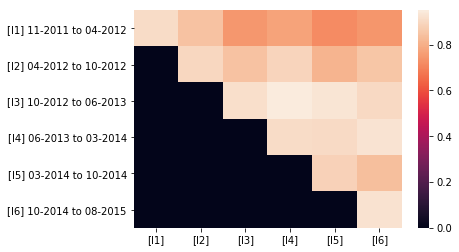

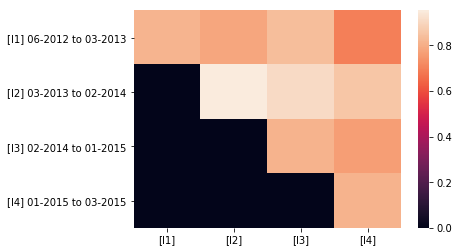

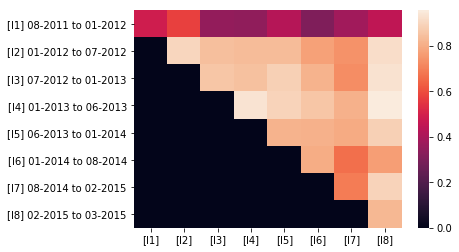

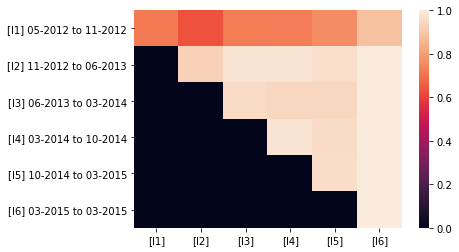

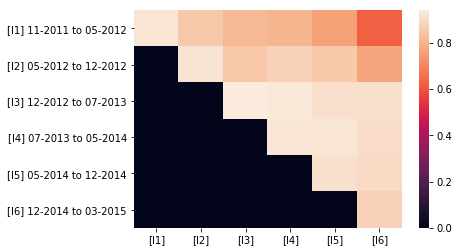

In [ ]:
[draw_heatmap(shape_summary(summary_300150150[0][i]).xs('f1-score', axis=1, drop_level=True).fillna(0)) for i in range(5)]

And these are the heatmaps for strategy cummulative for the 5 datasets

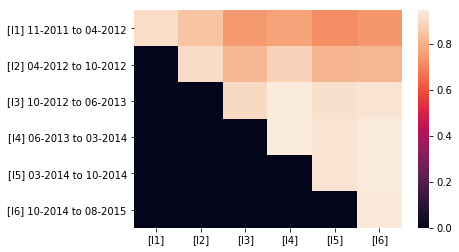

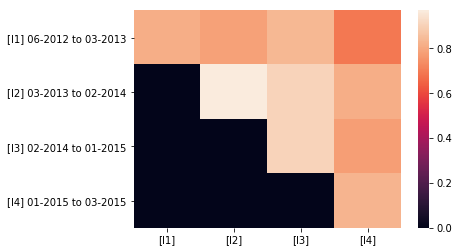

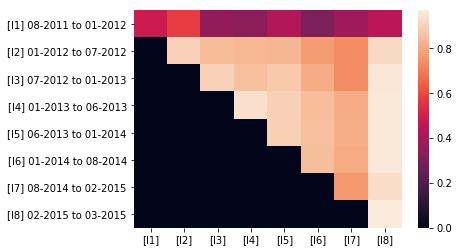

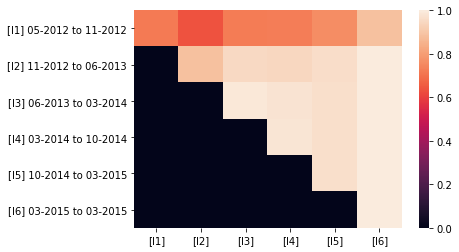

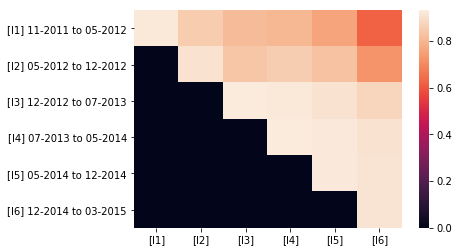

In [ ]:
[draw_heatmap(shape_summary(summary_300150150[1][i]).xs('f1-score', axis=1, drop_level=True).fillna(0)) for i in range(5)]

# RQ3: How does the different update strategies compare against each other?

Finally, we compute execute the experiment for all types of strategies. The final value is the mean of the F-Scores in the diagonal of the matrix obtained.

In [ ]:
def extract_values(summary, step = 0):
    mask = summary[0].sort_values(['train','test']).groupby('train').cumcount() <= step
    return pd.concat([summary[i][mask]['f1-score'] for i in range(len(summary))],axis=1)

In [ ]:
summary_300_fscore = [None]*5
summary_300_fscore = [extract_values([summary_300150150[i][j] for i in range(4)]) for j in range(5)]

for i in range(5):
    summary_300_fscore[i].columns = ['X','V','F','S']


In [ ]:
pd.concat([summary_300_fscore[i].mean() for i in range(5)], axis=1)

,0,1,2,3,4
X,0.907668,0.849116,0.790268,0.925582,0.915899
V,0.921329,0.881576,0.840622,0.925150,0.921801
F,0.900652,0.907067,0.815853,0.905460,0.913034
S,0.908680,0.849492,0.756128,0.890478,0.915416


Here, we use the T-test related to check whether there is a significant difference between each column. The result is that only the difference between 'V' and 'X is statistically significant.

In [ ]:
from scipy import stats
[(d,i,j,stats.ttest_rel(summary_300_fscore[d][i], summary_300_fscore[d][j])) for d in range(5) for ii,i in enumerate(summary_300_fscore[d].columns) for jj,j in enumerate(summary_300_fscore[d].columns) if i < j]

[(0,
  'V',
  'X',
  Ttest_relResult(statistic=1.5492403116193034, pvalue=0.18200984423541863)),
 (0,
  'F',
  'X',
  Ttest_relResult(statistic=-0.6460089737628508, pvalue=0.5467487967610757)),
 (0,
  'F',
  'V',
  Ttest_relResult(statistic=-2.5895525535869384, pvalue=0.0488633218449456)),
 (0,
  'F',
  'S',
  Ttest_relResult(statistic=-0.7885967170573052, pvalue=0.46607539476355414)),
 (0,
  'S',
  'X',
  Ttest_relResult(statistic=0.11293387739880535, pvalue=0.914477130783393)),
 (0,
  'S',
  'V',
  Ttest_relResult(statistic=-2.5876788186249264, pvalue=0.04897432130575175)),
 (1,
  'V',
  'X',
  Ttest_relResult(statistic=1.5030058246158124, pvalue=0.22986360205007353)),
 (1,
  'F',
  'X',
  Ttest_relResult(statistic=1.6726158153227522, pvalue=0.19299635241100918)),
 (1,
  'F',
  'V',
  Ttest_relResult(statistic=0.9572703888684264, pvalue=0.40905085528986734)),
 (1,
  'F',
  'S',
  Ttest_relResult(statistic=2.505523942804531, pvalue=0.08728079183946673)),
 (1,
  'S',
  'X',
  Ttest_rel